In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [2]:
path = 'D:/Image Classification Self/Data/Myntra Dataset/myntradataset/'

In [3]:
data = pd.read_csv(path + 'styles.csv')
print(data.shape)
data.head()

(44446, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970.0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386.0,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263.0,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379.0,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759.0,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [4]:
data_req = data.loc[:, ('id', 'masterCategory')]
data_req = data_req.dropna(axis=0).reset_index(drop=True)
data_req = data_req.sample(frac=1).reset_index(drop=True)
print(data_req.shape)
data_req

(44445, 2)


,id,masterCategory
0,50746.0,Footwear
1,56150.0,Personal Care
2,7425.0,Apparel
3,2065.0,Apparel
4,18644.0,Apparel
...,...,...
44440,31020.0,Apparel
44441,4328.0,Apparel
44442,59654.0,Apparel
44443,13259.0,Apparel


Footwear


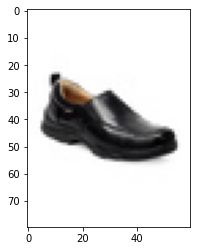

In [5]:
import matplotlib.pyplot as plt

print(data_req['masterCategory'][0])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][0])) + '.jpg'), cv.COLOR_BGR2RGB))

Personal Care


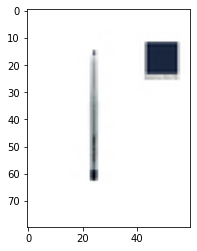

In [6]:
print(data_req['masterCategory'][1])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][1])) + '.jpg'), cv.COLOR_BGR2RGB))

Apparel


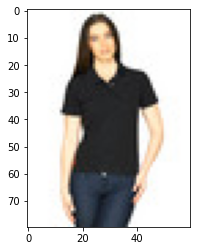

In [7]:
print(data_req['masterCategory'][3])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][3])) + '.jpg'), cv.COLOR_BGR2RGB))

Apparel


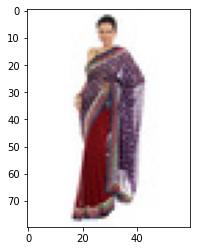

In [11]:
print(data_req['masterCategory'][1001])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][1001])) + '.jpg'), cv.COLOR_BGR2RGB))

In [13]:
classes = {'Accessories':0, 'Apparel':1, 'Footwear':2, 'Free Items':3, 'Home':4, 'Personal Care':5, 'Sporting Goods':6}

In [17]:
images = []
labels = []

def load_data(dataset):
    for i in range(len(dataset)):
        image = cv.imread(path + 'images/' + str(int(dataset['id'][i])) + '.jpg')
        if image is None:
            continue
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = cv.resize(image, (60, 80))
        image = image.astype('float32')/255.0
        label = classes[dataset['masterCategory'][i]]
        images.append(image)
        labels.append(label)
    images_r = np.array(images)
    labels_r = np.array(labels)
    return images_r, labels_r

In [18]:
images, labels = load_data(data_req)

In [19]:
images.shape, labels.shape

((44440, 80, 60, 3), (44440,))

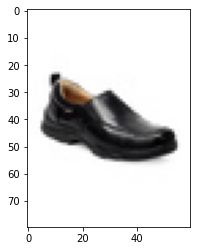

In [21]:
plt.imshow(images[0])

In [22]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=10)

In [25]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(39996, 80, 60, 3) (4444, 80, 60, 3) (39996, 7) (4444, 7)


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='training')
val_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='validation')

In [27]:
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()
model.add(Input((80, 60, 3)))

model.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())

model.add(Dense(512, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 80, 60, 16)        448       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 80, 60, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 80, 60, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 40, 30, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 40, 30, 32)        4640      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 40, 30, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 40, 30, 32)       

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint(save_best_only=True, monitor='val_accuracy', mode='max', patience=20, filepath='D:/Image Classification Self/Data/Myntra Dataset/myntradataset/myntra_clothes_category_classification.h5')

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history = model.fit_generator(train_batches, validation_data=val_batches, epochs=50, steps_per_epoch=(35996//32), callbacks=[cp])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1124 steps, validate for 125 steps
Epoch 1/50
1124/1124 [==============================] - 262s 233ms/step - loss: 0.3716 - accuracy: 0.8777 - val_loss: 0.3395 - val_accuracy: 0.8897
Epoch 2/50
1124/1124 [==============================] - 251s 223ms/step - loss: 0.1832 - accuracy: 0.9474 - val_loss: 0.1799 - val_accuracy: 0.9397
Epoch 3/50
1124/1124 [==============================] - 250s 222ms/step - loss: 0.1528 - accuracy: 0.9582 - val_loss: 0.6005 - val_accuracy: 0.8805
Epoch 4/50
1124/1124 [==============================] - 252s 224ms/step - loss: 0.1260 - accuracy: 0.9658 - val_loss: 0.5211 - val_accuracy: 0.8392
Epoch 5/50
1124/1124 [==============================] - 252s 224ms/step - loss: 0.1160 - accuracy: 0.9682 - val_loss: 0.2154 - val_accuracy: 0.9417
Epoch 6/50
1124/1124 [==============================] - 252s 224ms/step - loss: 0.1051 - 

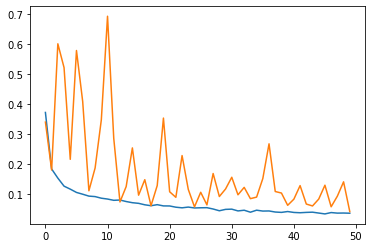

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

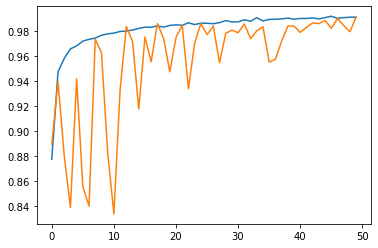

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [40]:
model.evaluate(X_test, Y_test_req)

4444/4444 [==============================] - 9s 2ms/sample - loss: 0.0734 - accuracy: 0.99140s - loss: 0.0759 - accura


[0.07339727355317216, 0.9914491]

In [41]:
from tensorflow.keras.models import load_model

model_new = load_model('D:/Image Classification Self/Data/Myntra Dataset/myntradataset/myntra_clothes_category_classification.h5')

In [42]:
predictions = []

for i in range(len(X_test)):
    image = X_test[i].reshape((1, 80, 60, 3))
    pred = model_new.predict(image)
    i = np.argmax(pred)
    predictions.append(i)

In [43]:
predictions

[0,
 1,
 0,
 5,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 5,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 5,
 5,
 0,
 2,
 0,
 1,
 5,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 5,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 5,
 5,
 1,
 2,
 5,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 5,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 5,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 5,
 1,
 5,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 5,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 5,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [45]:
accuracy_score(Y_test, predictions)

0.9914491449144914

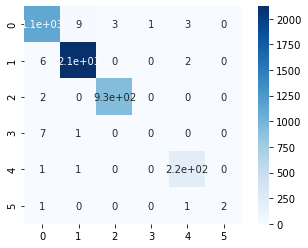

In [47]:
cm = confusion_matrix(Y_test, predictions)
hm = sns.heatmap(cm, annot=True, square=True, cmap='Blues')
plt.show(hm)